The Titanic dataset is a classic dataset used for machine learning and data analysis. It contains information about passengers who were aboard the RMS Titanic when it sank on its maiden voyage in 1912, including whether they survived or not. The dataset includes features such as passenger class, sex, age, siblings/spouses aboard, parents/children aboard, ticket number, fare, cabin number, and port of embarkation.

Researchers and data scientists often use this dataset to explore various aspects of the Titanic tragedy, such as the demographics of the passengers, factors that affected survival rates. It is a popular dataset for beginners in data science due to its relative simplicity.

**Column Profiling:**
1. **PassengerId:**
*     Data type: Integer
*     Unique values: Identifies each passenger uniquely.
2. **Survived:**
*   Data type: Integer (0 or 1)
*    Distribution: Number of passengers who survived (1) vs. those who did not (0). 
3. **Pclass:**
*    Data type: Integer (1, 2, or 3)
*    Distribution: Distribution of passengers across different classes (1st, 2nd, 3rd).
4. **Name:**
*    Data type: String
*    Unique values: Each value is unique.
5. **Sex:**
*    Data type: String (male or female)
*    Distribution: Number of male vs. female passengers.
*    Summary: Gender of the passenger.
6. **Age:**
*    Data type: Float
*    Missing values: Number of missing values.
*    Summary: Age of the passenger.
7. **SibSp:**
*    Data type: Integer
*    Distribution: Number of siblings/spouses aboard.
*    Summary: Indicates the presence of siblings or spouses.
8. **Parch:**
*    Data type: Integer
*    Distribution: Number of parents/children aboard.
*    Summary: Indicates the presence of parents or children.
9. **Ticket:**
*    Data type: String
*    Unique values: Number of unique ticket numbers.
*    Summary: Ticket number of the passenger.
10. **Fare:**
*    Data type: Float
*    Summary: Fare paid by the passenger.
11. **Cabin:**
*    Data type: String
*    Missing values: Number of missing values.
*    Summary: Cabin number of the passenger.
12. **Embarked:**
*    Data type: String Category (C, Q, S)
*    Distribution: Number of passengers embarked at each port.
*    Missing values: Number of missing values.
*    Summary: Port of embarkation.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Importing the Dataset & performing simple EDA

In [2]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# shape of the dataset
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Missing Values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Missing values (in percent)
titanic.isnull().sum()/len(titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

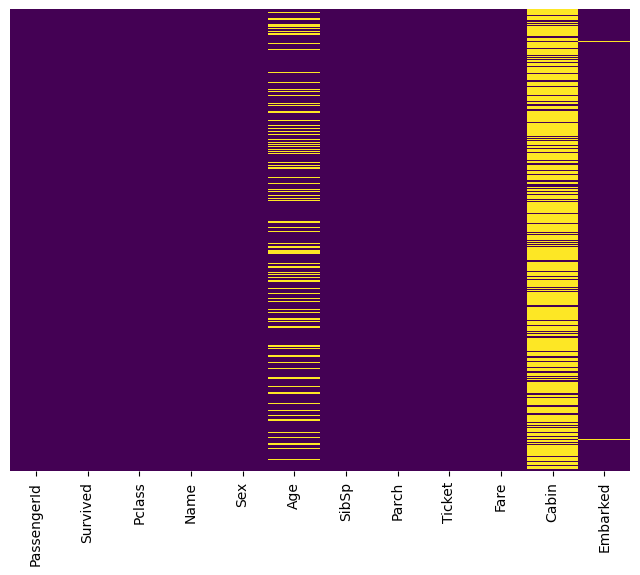

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(titanic.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [8]:
# Describing the numerical & datetime values
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Describing the numerical & datetime values
titanic.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


### Inference
* The dataset has a shape of (891, 12).
* There are 3 columns with missing values: Age, Cabin, and Embarked.
* We can handle missing values for Age and Embarked. However, since around 77.1% of rows are missing for Cabin, it would be wise to remove that column, as it does not impact the label column.
* We can also remove the PassengerId, Ticket and Name columns.
* Since there are only two rows with null values for the 'Embarked' column (i.e., 0.22% of dataset), we can safely remove them.

## Dealing with Null Values and Dropping Unnecessary Columns

In [10]:
titanic.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [11]:
titanic.dropna(subset=['Embarked'],inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


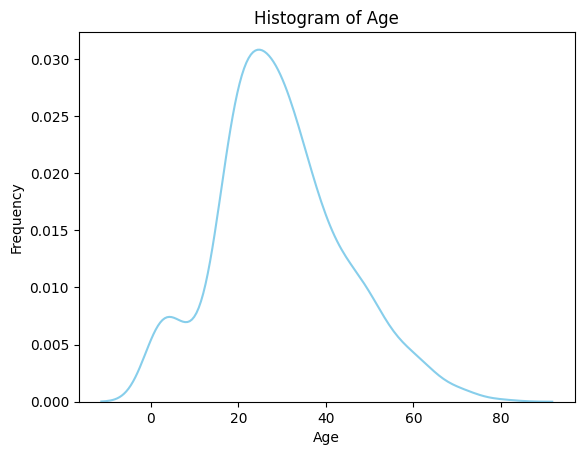

In [12]:
# Inorder to replace null values in Age column, we can draw boxplot or kdeplot
sns.kdeplot(data=titanic, x='Age', color='skyblue')  
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

### Inference
The distribution appears to be right-skewed, so it would be more appropriate to use the median instead of the mean.

In [13]:
imputer = SimpleImputer(strategy='median')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])

In [14]:
# Missing Values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


## Dealing with Outliers

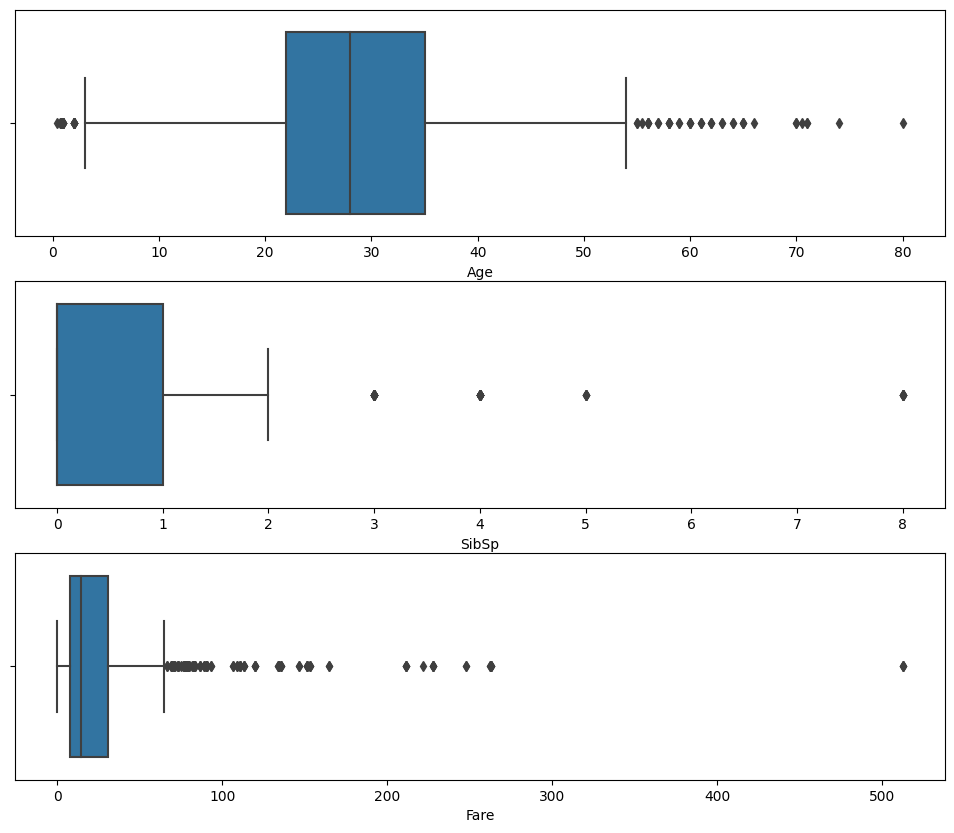

In [15]:
fig, axis = plt.subplots(nrows=3,ncols=1,figsize=(12, 10))

sns.boxplot(data=titanic, x="Age", ax=axis[0])
sns.boxplot(data=titanic, x="SibSp", ax=axis[1])
sns.boxplot(data=titanic, x="Fare", ax=axis[2])
plt.show()

### Inference
Both the 'Fare' and 'SibSp' columns exhibit the most outliers. However, for the 'Fare' column, it is important to note that the highest fare was paid by a male and a female, both from Class 1. These individuals likely had the means to pay high fares, so their values should not be considered outliers solely based on the fare amount.

## Univariate Analysis

### Pclass Column

In [16]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

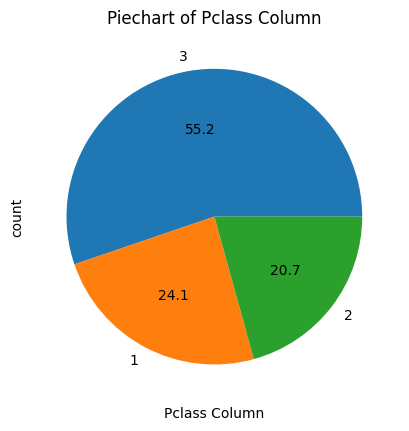

In [17]:
titanic['Pclass'].value_counts().plot(kind='pie',autopct="%.1f")
plt.xlabel('Pclass Column')
plt.title('Piechart of Pclass Column')
plt.show()

### Sex Column

In [18]:
titanic['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

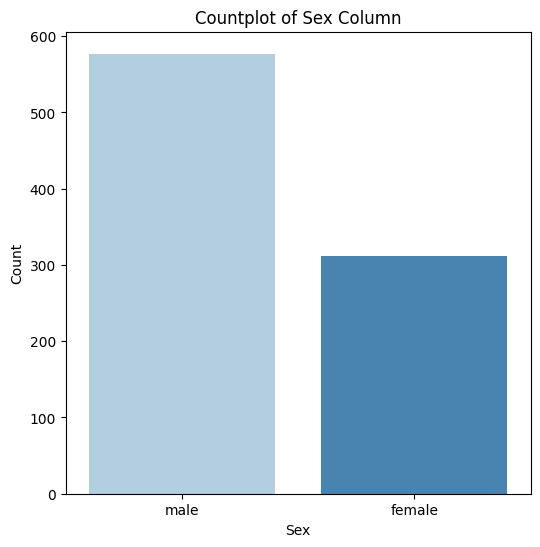

In [19]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Sex', data=titanic, palette='Blues')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Countplot of Sex Column')
plt.show()

### Age Column

In [20]:
titanic['Age_Category']=pd.cut(titanic['Age'],bins=[0,17,29,55,80],labels=['Child','Young','Mid-aged','Old'])

titanic['Age_Category'].value_counts()

Age_Category
Young       448
Mid-aged    289
Child       113
Old          39
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


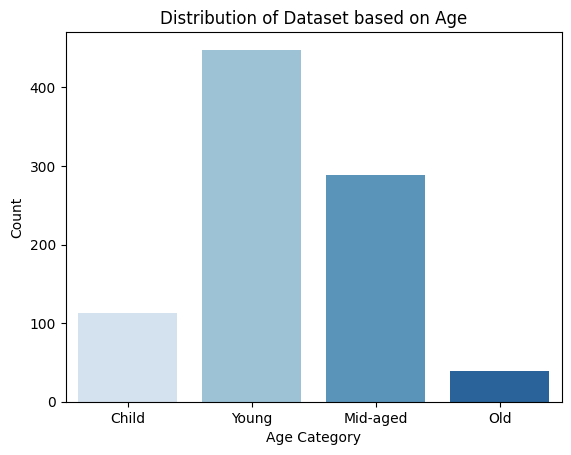

In [21]:
sns.countplot(x='Age_Category', data=titanic, palette='Blues')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Dataset based on Age')
plt.show()

### Embarked Column

In [22]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

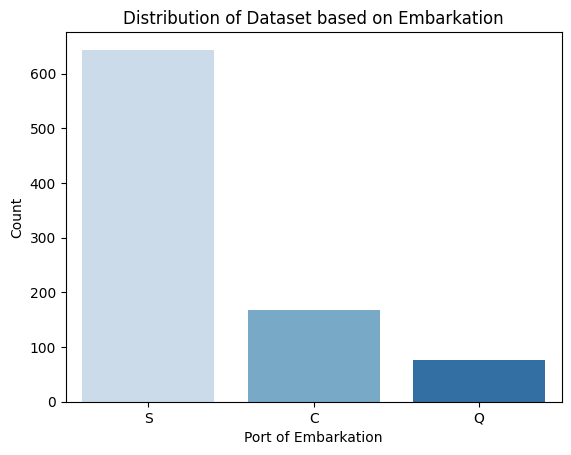

In [23]:
sns.countplot(x='Embarked', data=titanic, palette='Blues')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.title('Distribution of Dataset based on Embarkation')
plt.show()

### Survived (Label)

In [24]:
titanic['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

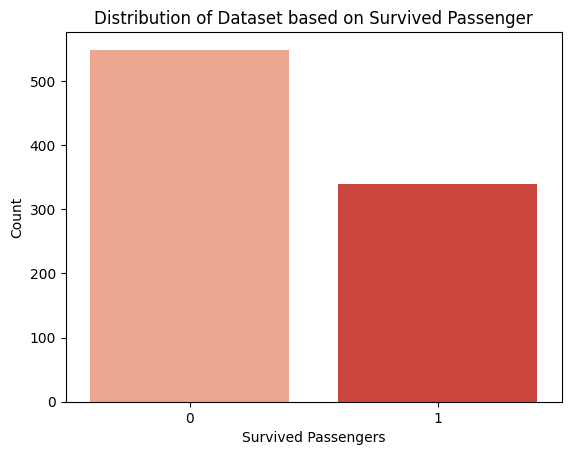

In [25]:
sns.countplot(x='Survived', data=titanic, palette='Reds')
plt.xlabel('Survived Passengers')
plt.ylabel('Count')
plt.title('Distribution of Dataset based on Survived Passenger')
plt.show()

### Inference
* Most of the people came from the 3rd class, accounting for 55.2% of the total, followed by the 1st class at 24.1% and the 2nd class at 20.7%.
* The majority of the people are male, constituting 64.9% (577/889) of the total passengers.
* Based on the age category column, the majority of passengers were young, representing 50.4% (448/889) of the total.
* Most of the passengers embarked from Southampton, comprising 72.5% (644/889) of the total.

## Feature Engineering

### Adding new columns 

In [26]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['IsAlone'] = (titanic['FamilySize'] == 1).astype(int)

## Bivariate Analysis

In [27]:
def indepedence(p_value,col1,col2):
    if p_value < 0.05:
        print(f'Rejected H0, {col1} and {col2} are dependent')
    else:
        print(f'Fail to Reject H0, {col1} and {col2} are independent')

### Pclass v/s Survived

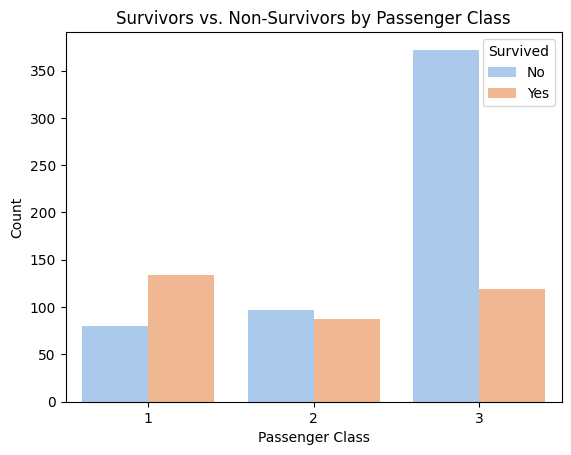

In [28]:
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='pastel')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survivors vs. Non-Survivors by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [29]:
val = pd.crosstab(index=titanic["Pclass"], columns=titanic["Survived"]).values

# H0: Pclass and Survived are independent
# Ha: Pclass and Survived are Dependent
p_value = chi2_contingency(val)[1]
print("p-value: ",p_value)
indepedence(p_value,'Pclass','Survived')

p-value:  1.1813624785477922e-22
Rejected H0, Pclass and Survived are dependent


### Sex v/s Survived

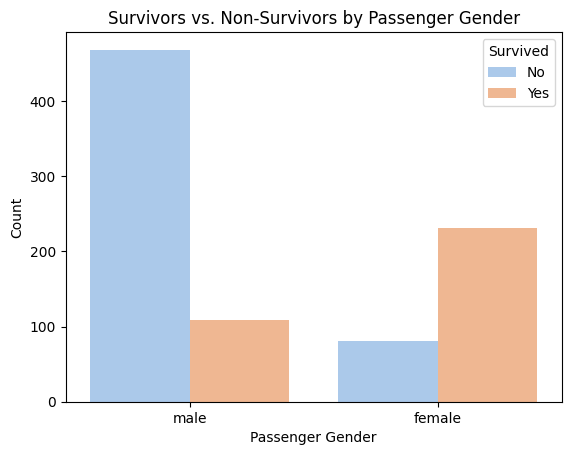

In [30]:
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='pastel')
plt.xlabel('Passenger Gender')
plt.ylabel('Count')
plt.title('Survivors vs. Non-Survivors by Passenger Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [31]:
val = pd.crosstab(index=titanic["Sex"], columns=titanic["Survived"]).values

# H0: Sex and Survived are independent
# Ha: Sex and Survived are Dependent
p_value = chi2_contingency(val)[1]
print("p-value: ",p_value)
indepedence(p_value,'Sex','Survived')

p-value:  3.7799096665576e-58
Rejected H0, Sex and Survived are dependent


### Embarked v/s Survived 

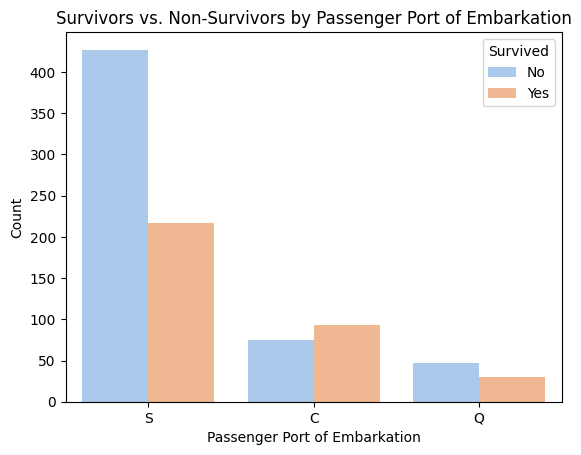

In [32]:
sns.countplot(x='Embarked', hue='Survived', data=titanic, palette='pastel')
plt.xlabel('Passenger Port of Embarkation')
plt.ylabel('Count')
plt.title('Survivors vs. Non-Survivors by Passenger Port of Embarkation')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [33]:
val = pd.crosstab(index=titanic["Embarked"], columns=titanic["Survived"]).values

# H0: Embarked and Survived are independent
# Ha: Embarked and Survived are Dependent
p_value = chi2_contingency(val)[1]
print("p-value: ",p_value)
indepedence(p_value,'Embarked','Survived')

p-value:  1.769922284120912e-06
Rejected H0, Embarked and Survived are dependent


### Age_category v/s Survived

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


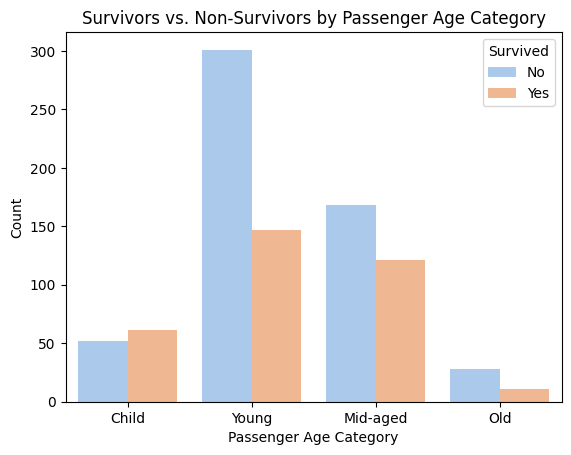

In [34]:
sns.countplot(x='Age_Category', hue='Survived', data=titanic, palette='pastel')
plt.xlabel('Passenger Age Category')
plt.ylabel('Count')
plt.title('Survivors vs. Non-Survivors by Passenger Age Category')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [35]:
val = pd.crosstab(index=titanic["Age_Category"], columns=titanic["Survived"]).values

# H0: Age_Category and Survived are independent
# Ha: Age_Category and Survived are Dependent
p_value = chi2_contingency(val)[1]
print("p-value: ",p_value)
indepedence(p_value,'Age_Category','Survived')

p-value:  0.00012045323610055177
Rejected H0, Age_Category and Survived are dependent


### Age v/s Survived

In [36]:
age_not_survived = titanic[titanic["Survived"]==0]["Age"]
age_survived = titanic[titanic["Survived"]==1]["Age"]

# H0: Age and Survived are independent
# Ha: Age and Survived are Dependent
p_value = ttest_ind(age_not_survived, age_survived)[1]
print("p-value: ",p_value)
indepedence(p_value,'Age','Survived')

p-value:  0.03739522542606732
Rejected H0, Age and Survived are dependent


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


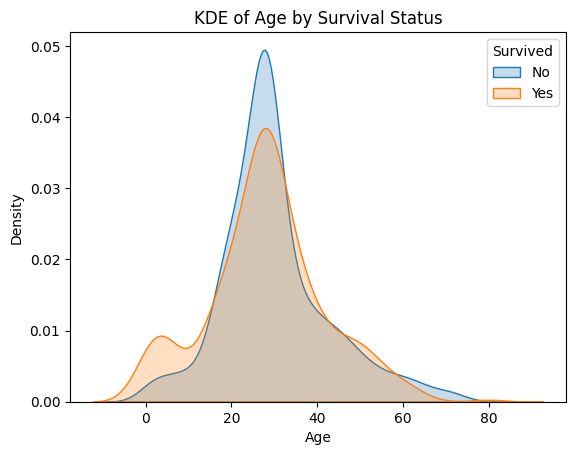

In [37]:
sns.kdeplot(age_not_survived, fill=True)
sns.kdeplot(age_survived, fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE of Age by Survival Status')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Fare v/s Survived

In [38]:
fare_not_survived = titanic[titanic["Survived"]==0]["Fare"]
fare_survived = titanic[titanic["Survived"]==1]["Fare"]

# H0: Fare and Survived are independent
# Ha: Fare and Survived are Dependent
p_value = ttest_ind(fare_not_survived, fare_survived)[1]
print("p-value: ",p_value)
indepedence(p_value,'Fare','Survived')

p-value:  1.0797887540538483e-14
Rejected H0, Fare and Survived are dependent


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


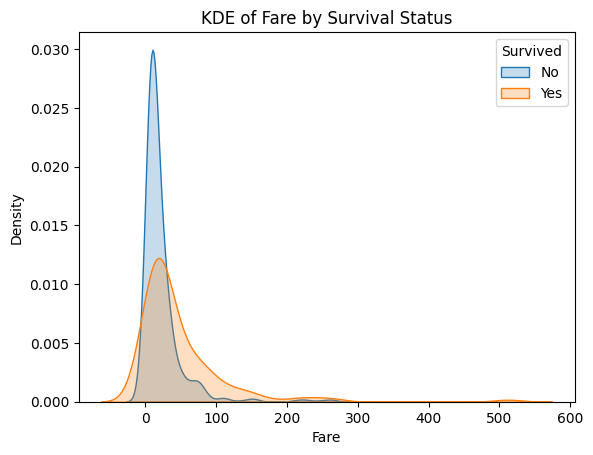

In [39]:
sns.kdeplot(fare_not_survived, fill=True)
sns.kdeplot(fare_survived, fill=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('KDE of Fare by Survival Status')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Parch v/s Survived

In [40]:
parch_not_survived = titanic[titanic["Survived"]==0]["Parch"]
parch_survived = titanic[titanic["Survived"]==1]["Parch"]

# H0: Parch and Survived are independent
# Ha: Parch and Survived are Dependent
p_value = ttest_ind(parch_not_survived, parch_survived)[1]
print("p-value: ",p_value)
indepedence(p_value,'Parch','Survived')

p-value:  0.013136766201094989
Rejected H0, Parch and Survived are dependent


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


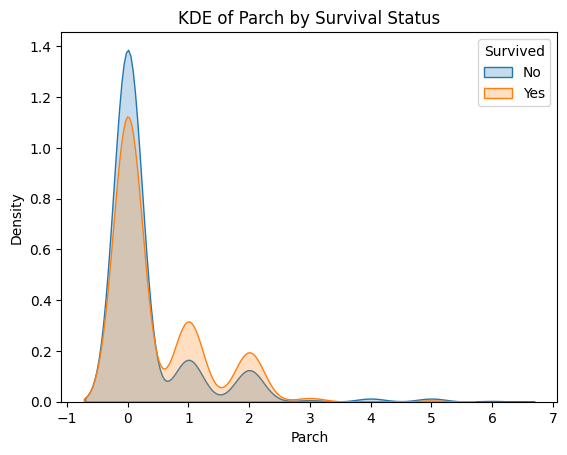

In [41]:
sns.kdeplot(parch_not_survived, fill=True)
sns.kdeplot(parch_survived, fill=True)
plt.xlabel('Parch')
plt.ylabel('Density')
plt.title('KDE of Parch by Survival Status')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Sibsp v/s Survived

In [42]:
sib_not_survived = titanic[titanic["Survived"]==0]["SibSp"]
sib_survived = titanic[titanic["Survived"]==1]["SibSp"]

# H0: SibSp and Survived are independent
# Ha: SibSp and Survived are Dependent
p_value = ttest_ind(sib_not_survived, sib_survived)[1]
print("p-value: ",p_value)
indepedence(p_value,'SibSp','Survived')

p-value:  0.3106753734113619
Fail to Reject H0, SibSp and Survived are independent


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


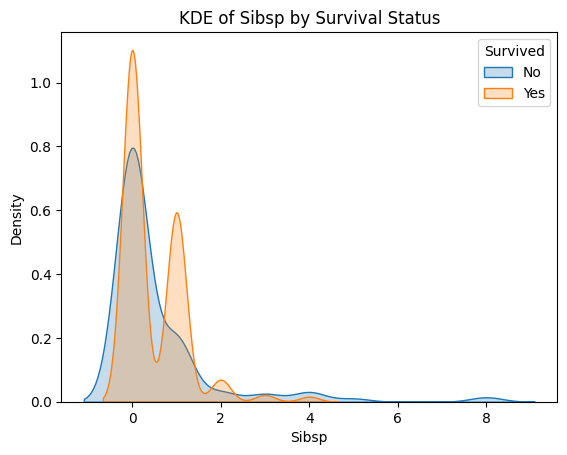

In [43]:
sns.kdeplot(sib_not_survived, fill=True)
sns.kdeplot(sib_survived, fill=True)
plt.xlabel('Sibsp')
plt.ylabel('Density')
plt.title('KDE of Sibsp by Survival Status')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### Family Size v/s Survived

In [44]:
familysize_not_survived = titanic[titanic["Survived"]==0]["FamilySize"]
familysize_survived = titanic[titanic["Survived"]==1]["FamilySize"]

# H0: FamilySize and Survived are independent
# Ha: FamilySize and Survived are Dependent
p_value = ttest_ind(familysize_not_survived, familysize_survived)[1]
print("p-value: ",p_value)
indepedence(p_value,'FamilySize','Survived')

p-value:  0.5862752380464455
Fail to Reject H0, FamilySize and Survived are independent


### IsAlone v/s Survived

In [45]:
val = pd.crosstab(index=titanic["IsAlone"], columns=titanic["Survived"]).values

# H0: IsAlone and Survived are independent
# Ha: IsAlone and Survived are Dependent
p_value = chi2_contingency(val)[1]
print("p-value: ",p_value)
indepedence(p_value,'IsAlone','Survived')

p-value:  1.2184807337771435e-09
Rejected H0, IsAlone and Survived are dependent


### Inference
Based on above observations,
* Passengers in Class 1 have a higher chance of survival compared to the other classes.
* The survival rate for females is higher than that for males.
* Passengers embarking from Southampton have a higher survival rate.
* There is a higher survival rate among children and youngsters in the age category.
* We are dropping the 'FamilySize' and 'SibSp' columns as they are not significantly correlated with the survival rate.
* removing the 'Age' column and use the 'Age_Category' column instead. As 'Age' has a non-linear or categorical effect on the outcome variable (survival rate).


In [46]:
titanic.drop(['FamilySize', 'SibSp','Age'], axis=1, inplace=True)

In [47]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      889 non-null    int64   
 1   Pclass        889 non-null    int64   
 2   Sex           889 non-null    object  
 3   Parch         889 non-null    int64   
 4   Fare          889 non-null    float64 
 5   Embarked      889 non-null    object  
 6   Age_Category  889 non-null    category
 7   IsAlone       889 non-null    int64   
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 56.6+ KB


## Final Inference
Based on the analysis of the Titanic dataset, we can make the following final inferences:

1. **Data Overview**:
   - The dataset has 891 rows and 12 columns.
   - There are missing values in the 'Age', 'Cabin', and 'Embarked' columns.

2. **Data Cleaning**:
   - We handled missing values for the 'Age' and 'Embarked' columns.
   - The 'Cabin' column was removed due to a high percentage of missing values (77.1%).
   - The 'PassengerId', 'Ticket', and 'Name' columns were also removed as they are not relevant for analysis.

3. **Data Distribution**:
   - The distribution for age appears to be right-skewed, so we decided to use the median instead of the mean for certain calculations.

4. **Passenger Analysis**:
   - The majority of passengers were from the 3rd class (55.2%), followed by the 1st class (24.1%) and the 2nd class (20.7%).
   - Most passengers were male (64.9%).
   - Most passengers embarked from Southampton (72.5%).

5. **Survival Analysis**:
   - Passengers in the 1st class had a higher chance of survival.
   - Females had a higher survival rate than males.
   - Passengers embarking from Southampton had a higher survival rate.
   - Children and youngsters had a higher survival rate.

6. **Feature Engineering**:
   - Next, we conducted bivariate analysis using the t-test for independence to compare numerical variables with the categorical 'Survived' column, and the chi-square test of independence to analyze the relationship between categorical variables and the 'Survived' column.
   - We removed the 'FamilySize' and 'SibSp' columns as they were not significantly correlated with the survival rate based on ttest and chi-squared test.
   - We removed the 'Age' column and used the 'Age_Category' column instead, as age had a non-linear or categorical effect on the survival rate.

In conclusion, the analysis indicates that factors such as passenger class, sex, age category, and embarked port were significant predictors of survival on the Titanic. These findings can be used for further analysis and modeling to understand the factors influencing survival rates on the Titanic.